<a href="https://colab.research.google.com/github/modanmodern/modanmodern/blob/tensorflow-study/tensorflowstudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.15.0
Hub version: 0.16.1
GPU is NOT AVAILABLE


In [1]:

encoder_block = tf.nlp.layers.TransformerEncoderBlock(
        num_attention_heads=2, inner_dim=10, inner_activation='relu')

batch, length, hidden_size = 2, 3, 4
qkv_inputs = tf.ones((batch, length, hidden_size), tf.float32)
attention_mask = None
outputs = encoder_block([qkv_inputs, attention_mask])
print(encoder_block.name)
print(outputs)


NameError: name 'tfm' is not defined

In [ ]:
!pip install tensorflow-text
!pip install tensorflow-hub
!pip install tensorflow-datasets
!pip3 install -q tf-models-nightly
# Fix Colab default opencv problem
!pip3 install -q opencv-python-headless==4.1.2.30


import numpy as np
import tensorflow as tf
import tensorflow_models as tfm
import tensorflow_text as tf_text
import tensorflow_hub as hub
import tensorflow_datasets as tfds

encoder_block = tfm.keras.layers.TransformerEncoderBlock(
        num_attention_heads=2, inner_dim=10, inner_activation='relu')

batch, length, hidden_size = 2, 3, 4
qkv_inputs = tf.ones((batch, length, hidden_size), tf.float32)
attention_mask = None
outputs = encoder_block([qkv_inputs, attention_mask])
print(encoder_block.name)
print(outputs)

In [4]:
print(tf.__version__)
print(tf_text.__version__)

2.15.0


NameError: name 'tf_text' is not defined

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_text as tf_text
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import tensorflow_models as tfm

print(tf.__version__)
print(tf_text.__version__)
print(hub.__version__)

print("Top-level modules: ", dir(tfm))
print("NLP modules: ", dir(tfm.nlp))
print("Vision modules: ", dir(tfm.vision))

encoder_block = tfm.nlp.layers.TransformerEncoderBlock(
        num_attention_heads=2, inner_dim=10, inner_activation='relu')

batch, length, hidden_size = 2, 3, 4
qkv_inputs = tf.ones((batch, length, hidden_size), tf.float32)
attention_mask = None
outputs = encoder_block([qkv_inputs, attention_mask])
print(encoder_block.name)
print(outputs)

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape
train_labels
len(test_labels)

2.15.0
4422102/4422102 [==============================] - 1s 0us/step


10000

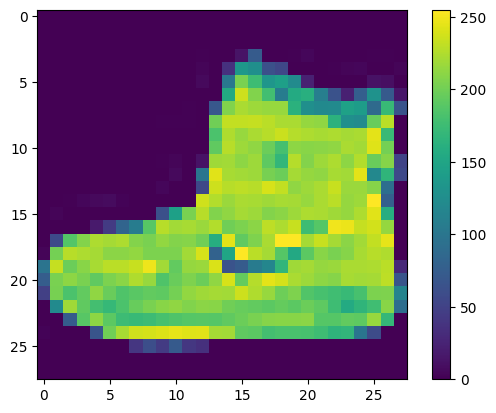

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

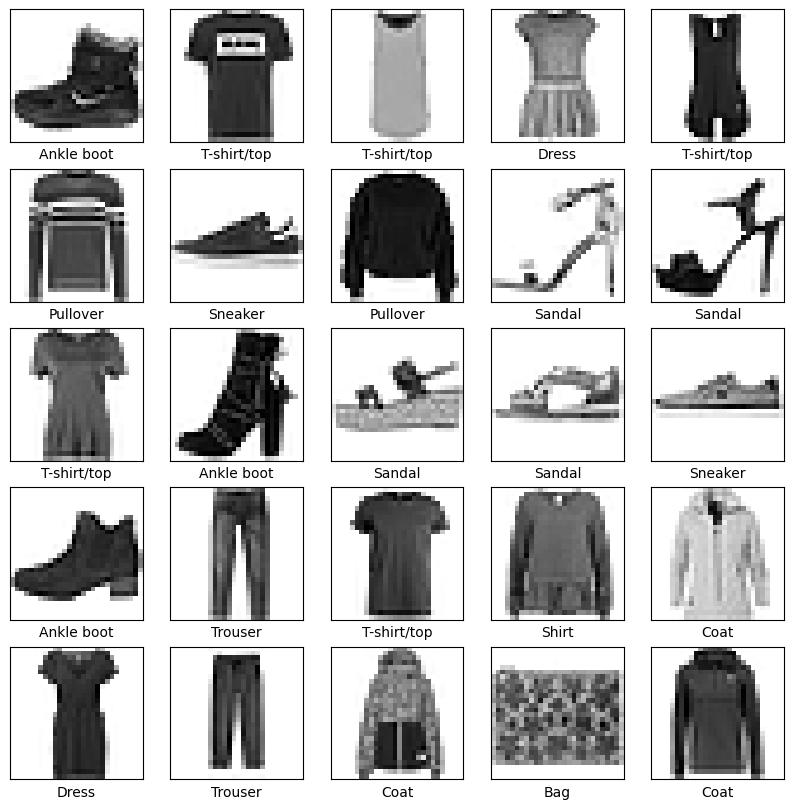

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4922 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3731 - accuracy: 0.8672
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3361 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3104 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2924 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2800 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2674 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2574 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2482 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.242

In [6]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3380 - accuracy: 0.8846 - 927ms/epoch - 3ms/step

Test accuracy: 0.8845999836921692


In [7]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.1848632e-06, 3.4836705e-09, 6.3578298e-09, 1.6787599e-11,
       3.1497535e-07, 2.5308365e-04, 4.8105477e-07, 3.3078227e-02,
       1.2626163e-06, 9.6666545e-01], dtype=float32)

In [8]:
np.argmax(predictions[0])

9

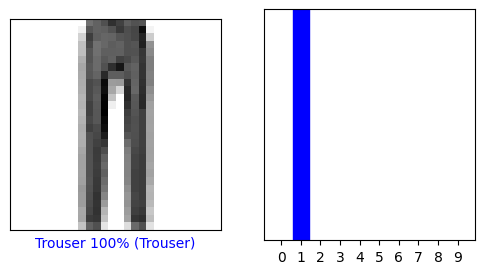

In [9]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

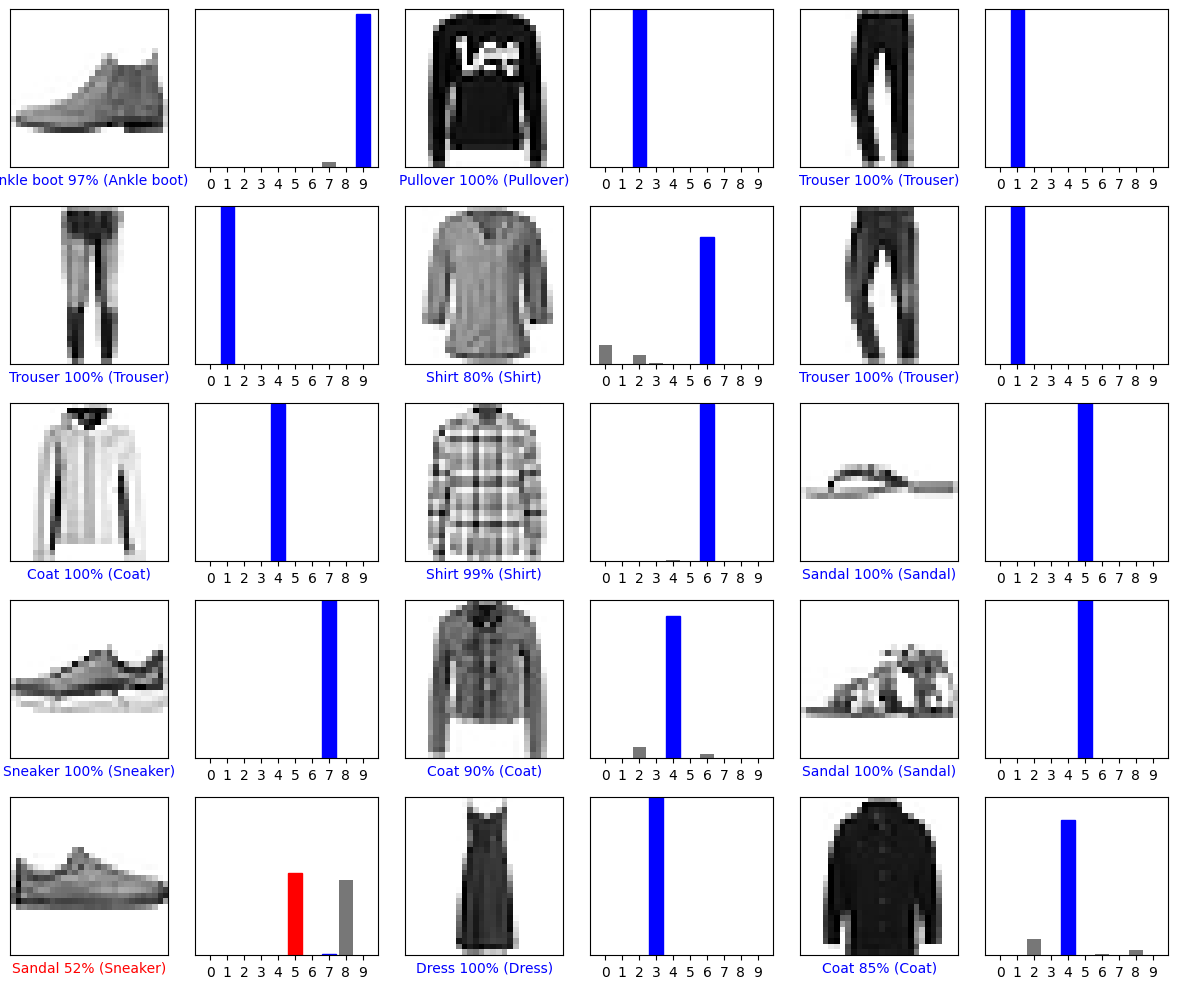

In [10]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [11]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 33ms/step
[[1.9392908e-05 2.0504085e-12 9.9885714e-01 1.9510395e-08 8.3763426e-04
  1.0264473e-10 2.8587112e-04 5.7554229e-14 2.8035001e-09 2.0282829e-13]]


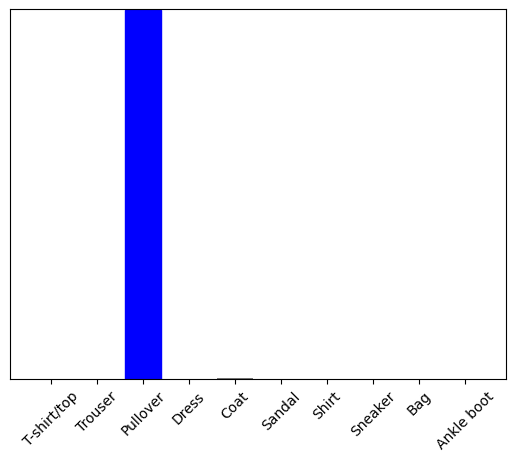

In [13]:
plot_value_array(1, predictions_single[0], test_labels)
_= plt.xticks(range(10), class_names, rotation=45)
plt.show()